## The purpose of this homework is to implement Canny Edge Detector

In [233]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from skimage.io import imread
from skimage.transform import resize
from scipy.ndimage.filters import gaussian_filter
from tqdm import tqdm

In [234]:
from skimage.color import rgb2gray
from scipy.signal import convolve2d
from scipy import ndimage
import cv2

### As you know from theory, Canny Edge Detection algorithm is composed of 4 steps: 
- Bluring the image to suppress the noise
- Calculation of the gradient and the magnitude of the image-gradient
- Non-maximum suppression
- Hystersis thresholding

#### At first let's read and visualize an image.

In [237]:
img = imread('tree.jpg')/255.
img = resize(img, (240, 320), preserve_range=True)
img = rgb2gray(img)

<IPython.core.display.Javascript object>


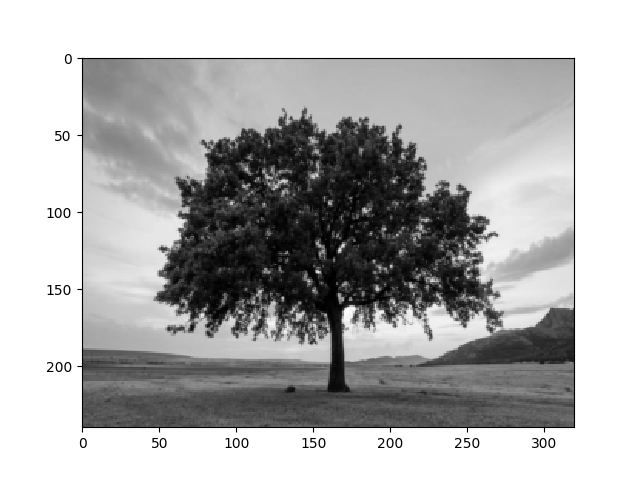

In [238]:
plt.imshow(img, cmap = 'gray')

In order to suppress the noise in the image, we apply bluring.

### Step 1: Gaussian blur

<IPython.core.display.Javascript object>


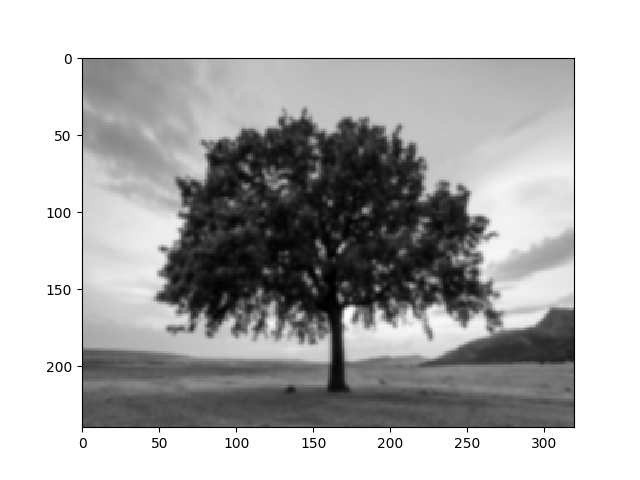

In [239]:
smooth_img = # TODO get gaussian blured image with some sigma and kernel size
plt.imshow(smooth_img, cmap = 'gray')
plt.show()

### Step 2: Gradient Calculation

In [240]:
G_x, G_y = # TODO Calculate the gradient of the image
M = # TODO Compute the magnitude of the image gradient
M = M/M.max()

<IPython.core.display.Javascript object>


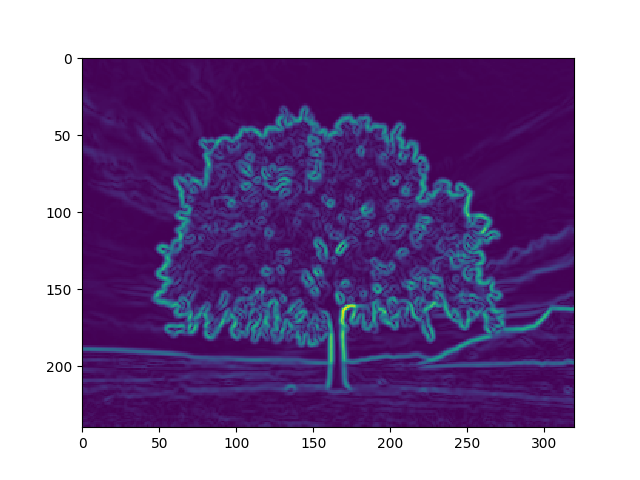

In [241]:
plt.imshow(M)

### Step 3: Non-Maximum Suppression

In [242]:
# TODO Implement non-maximum suppression algorithm

#### Note !!! for implementation of non-maximum suppression you can follow the following steps, but your own implementation is also applicable.

Defining four directions

In [252]:
d_x = (1, 1/np.sqrt(2), 0, 1/np.sqrt(2))
d_y = (0, 1/np.sqrt(2), 1, -1/np.sqrt(2))
D = np.array([[d_x[i], d_y[i]] for i in range(4)])

In [253]:
A = 
# TODO Obtain a matrix of shape (img.shape[0], img.shape[1]), 
# for which A[i,j] is the number of the closest direction from D in the point (i,j). 
# For example, if the direction D[1,:] is the closest to the gradient of the image in the point (i,j), 
# i.e. G[i,j,:], then A[i,j] = 1.

In [255]:
res = np.zeros((img.shape[0], img.shape[1]))
M_pad = np.zeros((img.shape[0]+2, img.shape[1]+2))
M_pad[1:-1,1:-1] = M.copy()
for i in tqdm(range(img.shape[0])):
    for j in range(img.shape[1]):
        M_p = # TODO Obtain the two values of pixels in M, 
        M_n = # which are one pixel far from the 
              # (i,j)th pixel trough the direction D[A[i,j]]
         
        if M_pad[i,j] >= M_p and M_pad[i,j] >= M_n:
            res[i,j] = M_pad[i,j]


100%|██████████| 240/240 [00:01<00:00, 185.13it/s]


<IPython.core.display.Javascript object>


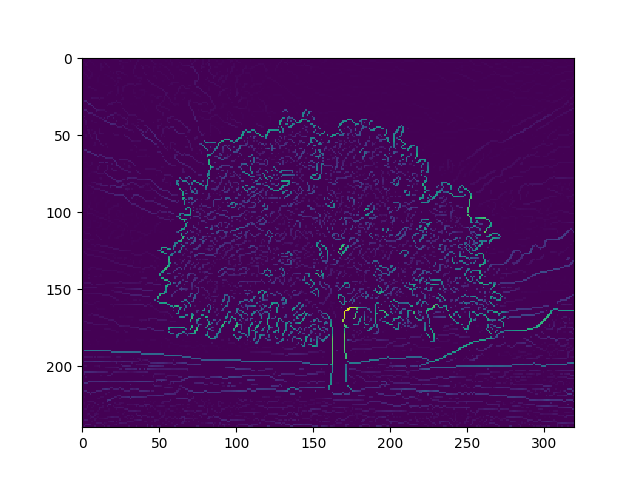

In [246]:
plt.imshow(res)

### Step 4: Hystersis Thresholding

In [248]:
def hyst(img, t_h, t_l):    
    # TODO Implement the hystersis thresholding with high threshold t_h, low threshold t_l
    return 

In [249]:
can_res = hyst(res, 0.2, 0.05)

<IPython.core.display.Javascript object>


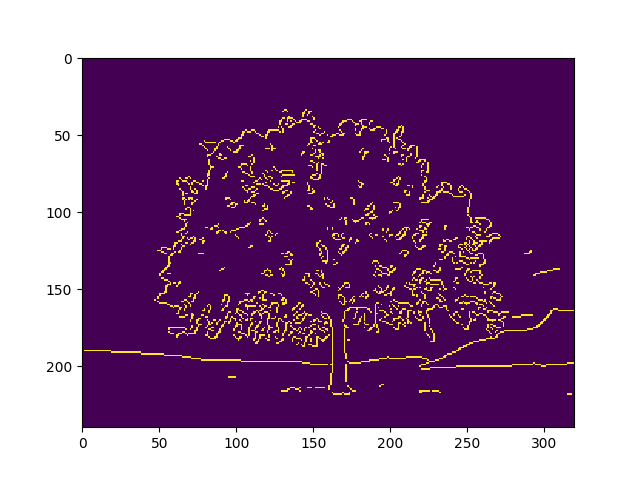

In [250]:
plt.imshow(can_res)